In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [158]:
test_data = pd.read_csv('loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [159]:
data = pd.read_csv('loan_train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [160]:
print('the training data has {} rows and {} columns.' .format(data.shape[0], data.shape[1]))

the training data has 614 rows and 13 columns.


In [161]:
# check whether there are any null values in the training dataset

print('The sum of missing values according to each column is: {} ' .format(data.isnull().sum()))
print('The total number of missing values in dataset is {}'.format(data.isnull().sum().sum()))

The sum of missing values according to each column is: Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 
The total number of missing values in dataset is 149


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


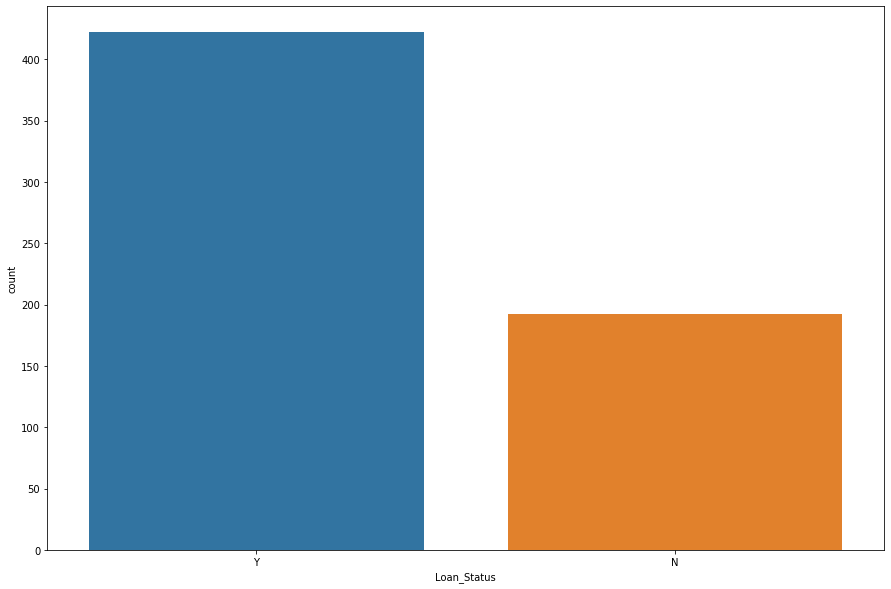

In [164]:
# lets see what is the status of loan

plt.figure(figsize=(15,10))
sns.countplot(data.Loan_Status);

In [165]:
# the percentage of loan_status 
data['Loan_Status'].value_counts()/len(data)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [166]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [167]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

F:\Temp\anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


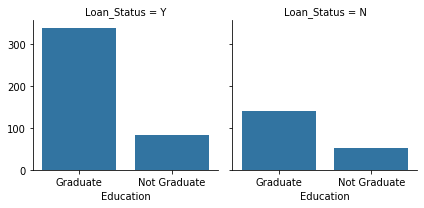

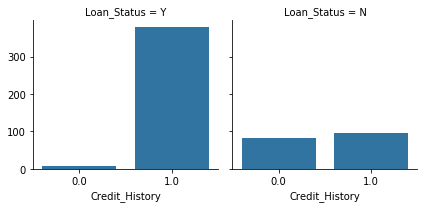

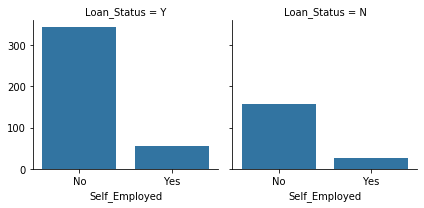

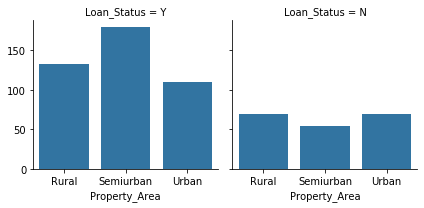

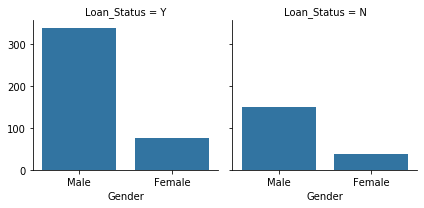

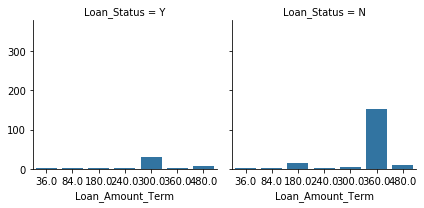

In [168]:
# lets visualize the loan_status with respect to each column

sns.FacetGrid(data, col='Loan_Status').map(sns.countplot, 'Education');
sns.FacetGrid(data, col='Loan_Status').map(sns.countplot, 'Credit_History');
sns.FacetGrid(data, col='Loan_Status').map(sns.countplot, 'Self_Employed');
sns.FacetGrid(data, col='Loan_Status').map(sns.countplot, 'Property_Area');
sns.FacetGrid(data, col='Loan_Status').map(sns.countplot, 'Gender');
sns.FacetGrid(data, col='Loan_Status').map(sns.countplot, 'Loan_Amount_Term');

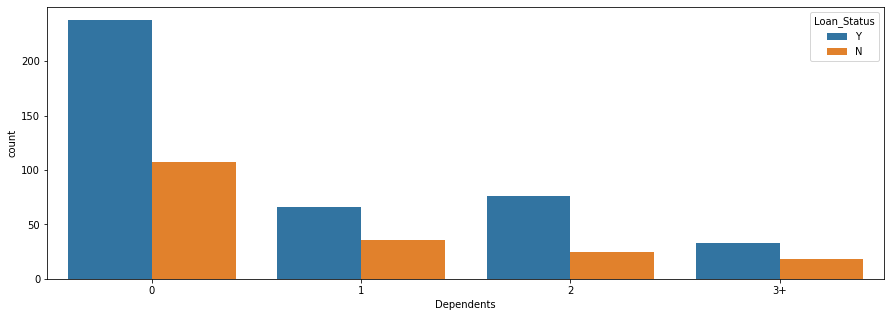

In [169]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue= 'Loan_Status', data=data);

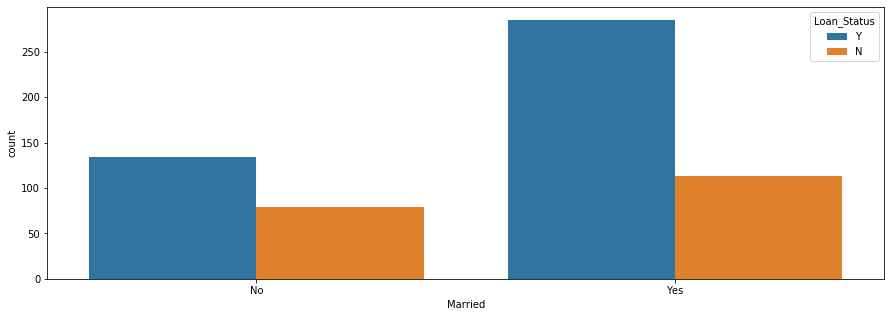

In [170]:
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=data)

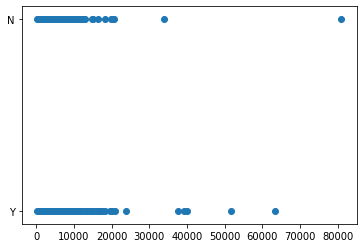

In [171]:
plt.scatter(data['ApplicantIncome'], data['Loan_Status']);

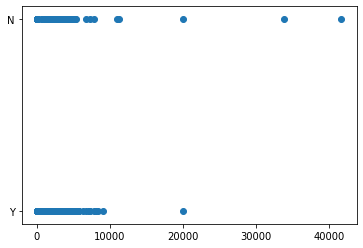

In [172]:
plt.scatter(data['CoapplicantIncome'], data['Loan_Status']);

In [173]:
data = data.drop('Loan_ID', axis =1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [174]:
# fill missing values in numerical and categorical columns
cat_cols = data.select_dtypes(['object'])
cat_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [175]:
cat_cols = cat_cols.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [176]:
cat_cols.isnull().any()

Gender           False
Married          False
Dependents       False
Education        False
Self_Employed    False
Property_Area    False
Loan_Status      False
dtype: bool

In [177]:
num_cols = data.select_dtypes(exclude='object')
num_cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [178]:
num_cols.fillna(method='bfill', inplace=True)

F:\Temp\anaconda\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [179]:
num_cols.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool

In [180]:
data1 = pd.concat([cat_cols, num_cols], axis=1)

In [181]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,5849,0.0,128.0,360.0,1.0
1,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0


In [182]:
print(pd.crosstab(data1['Gender'],data1['Loan_Status']))
print('\n')
print(pd.crosstab(data1['Married'],data1['Loan_Status']))
print('\n')
print(pd.crosstab(data1['Self_Employed'],data1['Loan_Status']))
print('\n')
print(pd.crosstab(data1['Education'],data1['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


In [183]:
data1['Loan_Status'].replace('N', 0, inplace=True)
data1['Loan_Status'].replace('Y', 1, inplace=True)

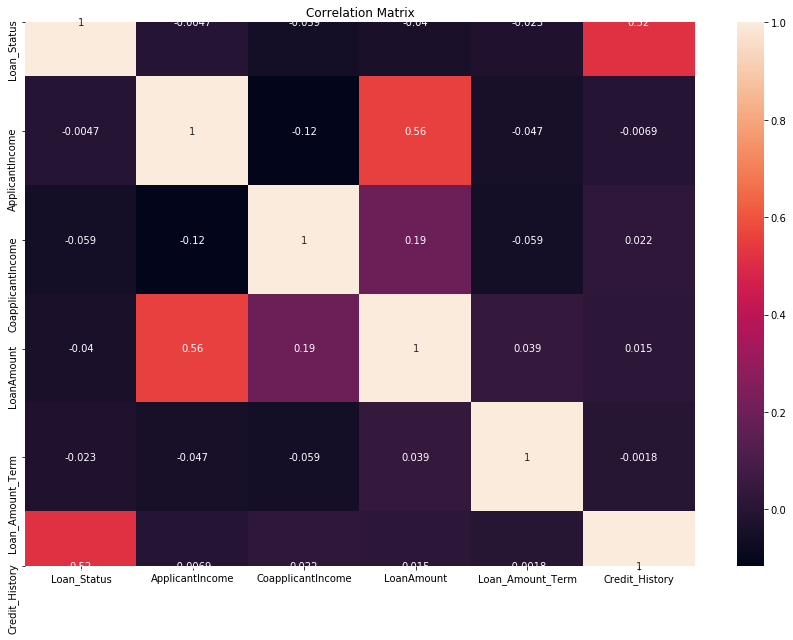

In [184]:
plt.figure(figsize=(15,10))
plt.title("Correlation Matrix")
sns.heatmap(data1.corr(), annot=True)

In [185]:
data1 = data1.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'])

In [186]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
0,Male,No,0,Graduate,No,Urban,1,1.0
1,Male,Yes,1,Graduate,No,Rural,0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1,1.0
4,Male,No,0,Graduate,No,Urban,1,1.0


In [187]:
le=LabelEncoder()
ohe=OneHotEncoder()
data1['Property_Area']=le.fit_transform(data1['Property_Area'])
data1['Dependents']=le.fit_transform(data1['Dependents'])
data1=pd.get_dummies(data1)

In [188]:
data1

,Dependents,Property_Area,Loan_Status,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,2,1,1.0,0,1,1,0,1,0,1,0
1,1,0,0,1.0,0,1,0,1,1,0,1,0
2,0,2,1,1.0,0,1,0,1,1,0,0,1
3,0,2,1,1.0,0,1,0,1,0,1,1,0
4,0,2,1,1.0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,1.0,1,0,1,0,1,0,1,0
610,3,0,1,1.0,0,1,0,1,1,0,1,0
611,1,2,1,1.0,0,1,0,1,1,0,1,0
612,2,2,1,1.0,0,1,0,1,1,0,1,0


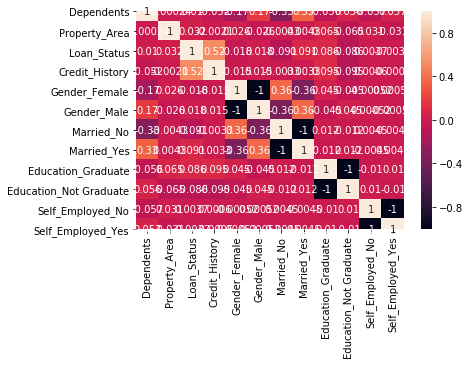

In [189]:
sns.heatmap(data1.corr(), annot=True)

In [192]:
# we drop the columns which are having least correlation.
data1 = data1.drop(columns=['Gender_Female', 'Married_No', 'Education_Not Graduate','Self_Employed_No'])

In [193]:
data1.head()

,Dependents,Property_Area,Loan_Status,Credit_History,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes
0,0,2,1,1.0,1,0,1,0
1,1,0,0,1.0,1,1,1,0
2,0,2,1,1.0,1,1,1,1
3,0,2,1,1.0,1,1,0,0
4,0,2,1,1.0,1,0,1,0


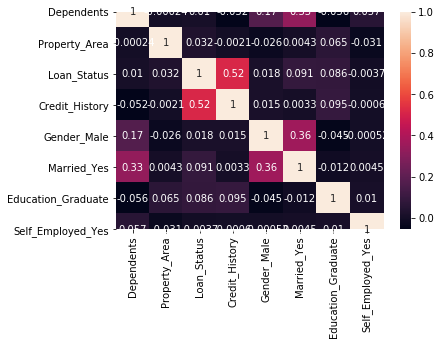

In [194]:
sns.heatmap(data1.corr(), annot=True)

In [195]:
data1 = data1.drop(columns=['Self_Employed_Yes', 'Dependents', 'Education_Graduate'])

In [196]:
X = data1.drop('Loan_Status', axis=1)
y = data1['Loan_Status']

In [197]:
#classification with defailt gini impurity we get 79% accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(min_samples_split = 100)
print(cross_val_score(dt, X, y, scoring='accuracy', cv=10).mean())

0.7996617226125422


In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
dtr = DecisionTreeClassifier(min_samples_split=100)
dtr.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [319]:
pred = dtr.predict(X_test)

In [320]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, pred))

0.7967479674796748


In [321]:
print(dtr.score(X_train, y_train))

0.8044806517311609


In [322]:
print(dtr.score(X_test, y_test))

0.7967479674796748


In [323]:
print(confusion_matrix(y_test, pred))

[[19 24]
 [ 1 79]]


In [324]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [287]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print(cross_val_score(lr, X, y, scoring='accuracy', cv=10).mean())

0.8029404111371324


F:\Temp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Temp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Temp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Temp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Temp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Temp\an

In [259]:
lr.fit(X_train, y_train)

F:\Temp\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
pred1 = lr.predict(X_test)

In [261]:
print(lr.score(X_train, y_train))

0.8044806517311609


In [262]:
print(accuracy_score(y_test, pred1))

0.7967479674796748


In [263]:
print(confusion_matrix(y_test, pred1))

[[19 24]
 [ 1 79]]


In [264]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [265]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [266]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
pred3 = knc.predict(X_test)

In [267]:
print(knc.score(X_train, y_train))

0.8085539714867617


In [268]:
print(accuracy_score(y_test, pred3))

0.7886178861788617


In [269]:
print(confusion_matrix(y_test, pred3))

[[19 24]
 [ 2 78]]


In [270]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [271]:
svc = SVC()
svc.fit(X_train, y_train)
pred4 = svc.predict(X_test)

F:\Temp\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [272]:
print(svc.score(X_train, y_train))
print('\n')
print(accuracy_score(y_test, pred4))
print('\n')
print(confusion_matrix(y_test, pred4))
print('\n')
print(classification_report(y_test, pred4))

0.8044806517311609


0.7967479674796748


[[19 24]
 [ 1 79]]


              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [327]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, random_state = 70, verbose = 1, n_jobs = -1)
rfc.fit(X_train, y_train)
pred5 = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [328]:
print(rfc.score(X_train, y_train))
print('\n')
print(accuracy_score(y_test, pred5))
print('\n')
print(confusion_matrix(y_test, pred5))
print('\n')
print(classification_report(y_test, pred5))

0.8085539714867617


0.7886178861788617


[[19 24]
 [ 2 78]]


              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Therefore from all the models we prefer logistic Regression model as its accuracy is better than all the other models

In [275]:
from sklearn.model_selection import KFold

In [277]:
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X):
    print("train:", train_index,"test:", test_index)

train: [154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398

In [290]:
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators=100, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

In [291]:
model.fit(X_train, y_train)
pred7 = model.predict(X_test)

In [292]:
print(model.score(X_train, y_train))
print('\n')
print(accuracy_score(y_test, pred7))
print('\n')
print(confusion_matrix(y_test, pred7))
print('\n')
print(classification_report(y_test, pred7))

0.7637474541751528


0.7398373983739838


[[23 20]
 [12 68]]


              precision    recall  f1-score   support

           0       0.66      0.53      0.59        43
           1       0.77      0.85      0.81        80

    accuracy                           0.74       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.73      0.74      0.73       123



In [329]:
from xgboost import XGBClassifier

In [335]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [336]:
y_pred = model2.predict(X_test)
predictions = [round(value) for value in y_pred]

In [337]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.86%
Accuracy: 78.86%


In [338]:
print(model.score(X_train, y_train))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

0.7637474541751528


[[19 24]
 [ 2 78]]


              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123

